In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Year 4/Data Mining/Mini Project/')
!pwd

/content/drive/My Drive/Year 4/Data Mining/Mini Project


In [ ]:
!ls

'Another Model - Prediction Implementation.ipynb'   my_basket_sets.csv
 basket_analysis.csv				    resources
 data						    sales_clothes.csv
'Data Cleaning + EDA - Project prediction.ipynb'   'Sequence Mining.ipynb'
 ecommerce_basket_analysis.csv


In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data/sales_clothes.csv')
data.rename(columns = {'No.':'product_id'}, inplace = True)

In [ ]:
data['units_sold'].value_counts()

units_sold
100       500
1000      402
5000      216
10000     176
20000     101
50         76
10         49
50000      16
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: count, dtype: int64

In [ ]:
# Select only unit_solds that are greater or equal to 10
data = data[data['units_sold'] >=100]
data = data[data['units_sold'] <50000]
data.head()

,product_id,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
0,0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,0,0,white,M,50,4,34,50,CN,4.128521
1,1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,0,0,green,XS,50,2,41,50,CN,3.899673
2,2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,0,0,other,XS,1,3,36,50,CN,3.989831
3,3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,0,0,black,M,50,2,41,50,CN,4.020435
4,4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,0,0,yellow,S,1,1,35,50,CN,4.001588


In [ ]:
data.to_csv('data/sales_clothes_filtered.csv', index=False)

In [ ]:
data['units_sold'].value_counts()

units_sold
100      500
1000     402
5000     216
10000    176
20000    101
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1555
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   1395 non-null   int64  
 1   price                        1395 non-null   float64
 2   retail_price                 1395 non-null   int64  
 3   units_sold                   1395 non-null   int64  
 4   uses_ad_boosts               1395 non-null   int64  
 5   rating                       1395 non-null   float64
 6   rating_count                 1395 non-null   int64  
 7   rating_five_count            1395 non-null   float64
 8   rating_four_count            1395 non-null   float64
 9   rating_three_count           1395 non-null   float64
 10  rating_two_count             1395 non-null   float64
 11  rating_one_count             1395 non-null   float64
 12  badges_count                 1395 non-null   int64  
 13  badge_local_product    

In [ ]:
data.describe()

,product_id,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,...,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,790.447312,8.398222,23.128315,3807.885305,0.453763,3.795534,792.769892,385.084588,155.323297,114.331900,...,83.969176,0.116129,0.020789,0.081720,0.013620,34.000000,2.356272,40.498208,49.860932,4.042471
std,455.294970,3.865479,30.464317,5591.261453,0.498036,0.438702,1398.449068,691.631301,284.123012,209.491571,...,152.394079,0.356521,0.142727,0.274037,0.115949,21.012704,1.000693,20.121702,2.272508,0.195708
min,0.000000,1.000000,1.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.000000,2.941176
25%,399.500000,5.860000,7.000000,100.000000,0.000000,3.540000,37.000000,17.000000,7.000000,5.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,8.500000,2.000000,31.000000,50.000000,3.936804
50%,791.000000,8.000000,10.000000,1000.000000,0.000000,3.830000,207.000000,93.000000,37.000000,28.000000,...,23.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,40.000000,50.000000,4.046825
75%,1182.500000,11.000000,26.000000,5000.000000,1.000000,4.090000,900.000000,431.000000,171.000000,134.000000,...,97.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,43.000000,50.000000,4.167628
max,1572.000000,49.000000,252.000000,20000.000000,1.000000,5.000000,12041.000000,5723.000000,2701.000000,1656.000000,...,1404.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,140.000000,50.000000,5.000000


In [ ]:
# Encode the categorical attributes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['product_color'] = le.fit_transform(data['product_color'])
data['product_variation_size_id'] = le.fit_transform(data['product_variation_size_id'])
data['origin_country'] = le.fit_transform(data['origin_country'])
data['units_sold'] = le.fit_transform(data['units_sold'])

In [ ]:
data['product_color'].unique()

array([10,  5,  7,  1, 11,  2,  8,  6,  9,  4,  3,  0])

### Using k-folds method

In [ ]:
X = data.drop(['units_sold'], axis=1)
y = data['units_sold']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1395, 23)
Shape of y: (1395,)


#### SVM with PCA



Cross-validation scores: [0.75268817 0.77060932 0.73835125 0.7311828  0.77777778]
Mean cross-validation score: 0.754121863799283
Accuracy on the entire dataset: 0.7670250896057348
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       500
           1       0.77      0.69      0.73       402
           2       0.63      0.61      0.62       216
           3       0.66      0.69      0.68       176
           4       0.90      0.62      0.74       101

    accuracy                           0.77      1395
   macro avg       0.76      0.71      0.73      1395
weighted avg       0.77      0.77      0.76      1395



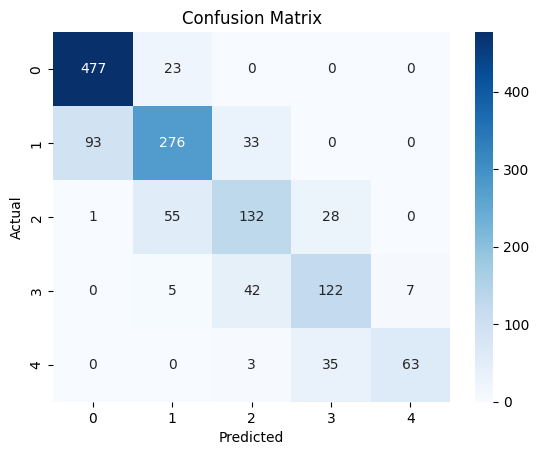

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the pipeline
steps = [('pca', PCA(n_components=5)), ('m', SVC(kernel='linear', C=1.0, random_state=42))]

# Initialize the SVM model
svm_model = Pipeline(steps=steps)

# Apply k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the SVM model on the entire dataset
svm_model.fit(X_scaled, y)

# Predict on the entire dataset (or you can use a separate test set if available)
y_pred = svm_model.predict(X_scaled)

# Evaluate the model
print("Accuracy on the entire dataset:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### SVM without PCA

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Apply k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the SVM model on the entire dataset
svm_model.fit(X_scaled, y)

# Predict on the entire dataset (or you can use a separate test set if available)
y_pred = svm_model.predict(X_scaled)

# Evaluate the model
print("Accuracy on the entire dataset:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Cross-validation scores: [0.76344086 0.81003584 0.77777778 0.76702509 0.80645161]
Mean cross-validation score: 0.7849462365591398
Accuracy on the entire dataset: 0.8193548387096774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       500
           1       0.82      0.77      0.79       402
           2       0.68      0.66      0.67       216
           3       0.74      0.74      0.74       176
           4       0.94      0.75      0.84       101

    accuracy                           0.82      1395
   macro avg       0.81      0.78      0.79      1395
weighted avg       0.82      0.82      0.82      1395



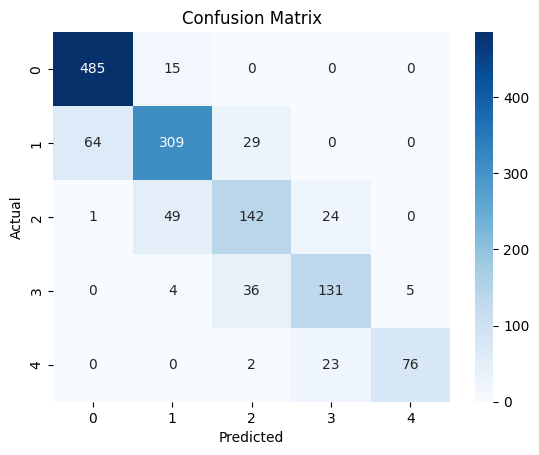

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Using hold-out method

Best C: 1
Best cross-validation score: 0.7912115631005766
Accuracy: 0.7670250896057348
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
weighted avg       0.76      0.77      0.76       279



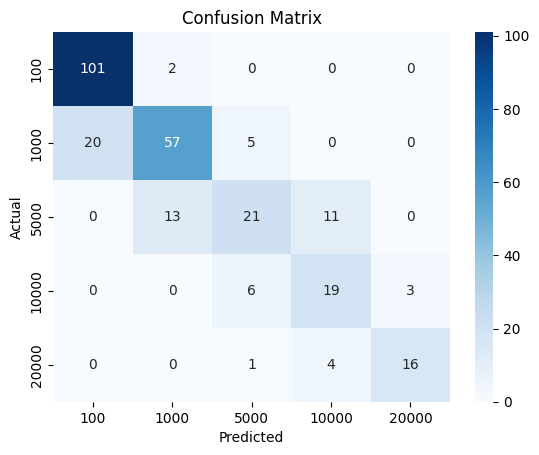

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Apply Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C: {best_C}")
print(f"Best cross-validation score: {best_score}")

Accuracy: 0.7670250896057348
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
weighted avg       0.76      0.77      0.76       279



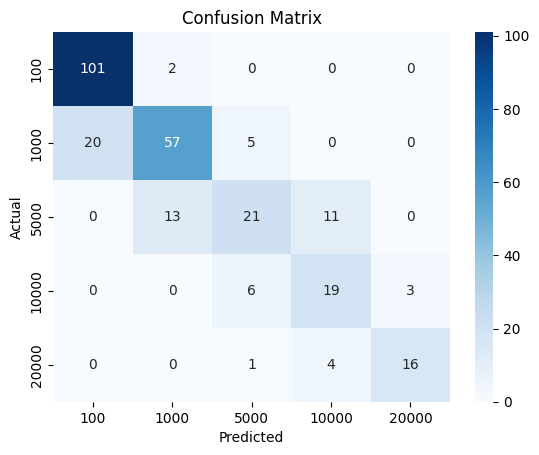

In [ ]:
# Train the SVM model with the best C on the training set
best_svm_model = SVC(kernel='linear', C=best_C, random_state=42)
best_svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.7912115631005766

Training DecisionTree...
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.7553411274823831

Training KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.6227658552210122

Accuracy of SVM on the test set: 0.7670250896057348
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
wei

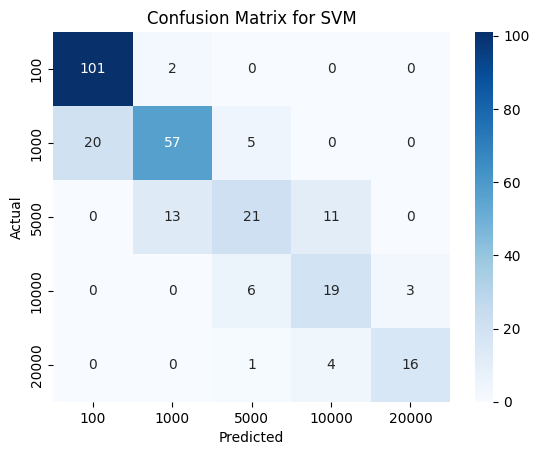

Accuracy of DecisionTree on the test set: 0.7240143369175627
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       103
           1       0.70      0.67      0.68        82
           2       0.56      0.51      0.53        45
           3       0.53      0.68      0.59        28
           4       0.82      0.67      0.74        21

    accuracy                           0.72       279
   macro avg       0.69      0.68      0.68       279
weighted avg       0.73      0.72      0.72       279



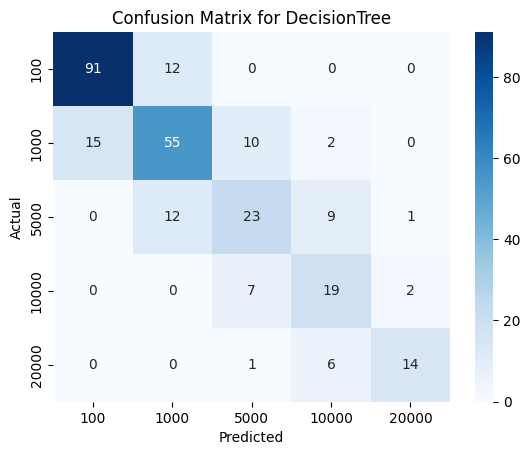

Accuracy of KNN on the test set: 0.6057347670250897
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       103
           1       0.50      0.62      0.55        82
           2       0.58      0.31      0.41        45
           3       0.61      0.61      0.61        28
           4       1.00      0.62      0.76        21

    accuracy                           0.61       279
   macro avg       0.67      0.58      0.60       279
weighted avg       0.62      0.61      0.60       279



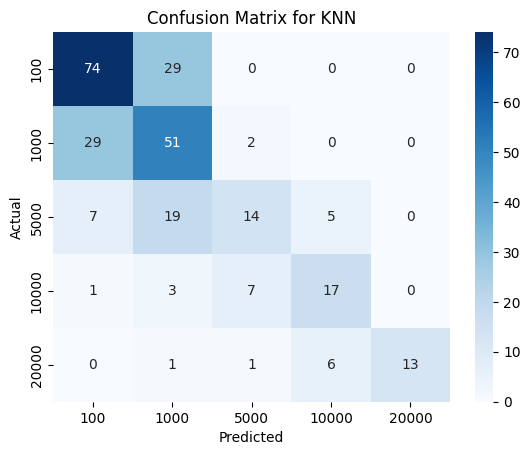

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.7912115631005766

Training DecisionTree...
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.7553411274823831

Training KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.6227658552210122

Accuracy of SVM on the test set: 0.7670250896057348
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
wei

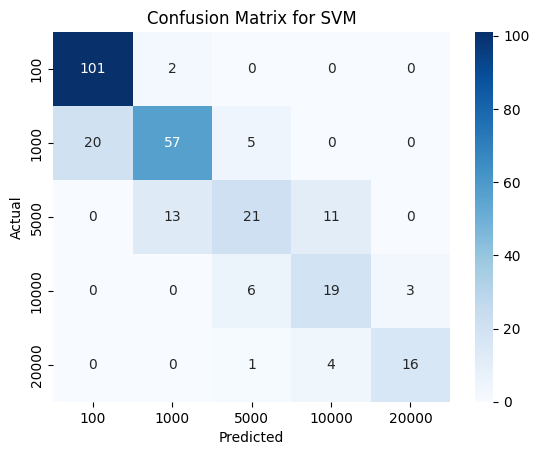

Accuracy of DecisionTree on the test set: 0.7240143369175627
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       103
           1       0.70      0.67      0.68        82
           2       0.56      0.51      0.53        45
           3       0.53      0.68      0.59        28
           4       0.82      0.67      0.74        21

    accuracy                           0.72       279
   macro avg       0.69      0.68      0.68       279
weighted avg       0.73      0.72      0.72       279



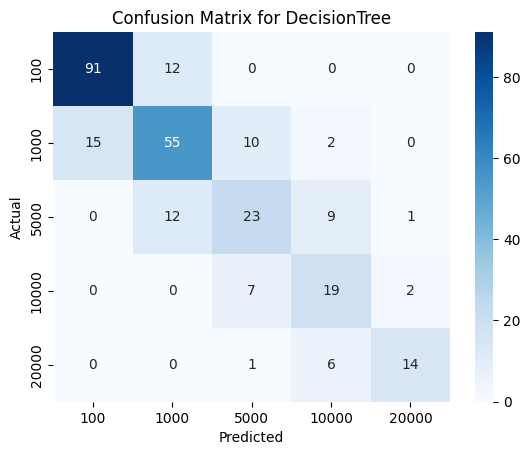

Accuracy of KNN on the test set: 0.6057347670250897
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       103
           1       0.50      0.62      0.55        82
           2       0.58      0.31      0.41        45
           3       0.61      0.61      0.61        28
           4       1.00      0.62      0.76        21

    accuracy                           0.61       279
   macro avg       0.67      0.58      0.60       279
weighted avg       0.62      0.61      0.60       279



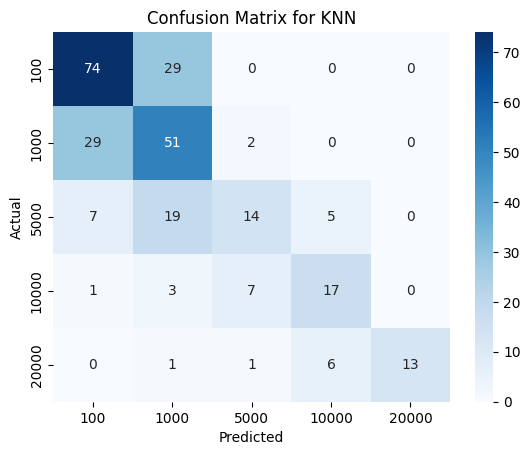

In [ ]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'SVM': SVC(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }

    param_grids = {
        'SVM': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
        'DecisionTree': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
    }

    best_models = {}

    for model_name in models:
        print(f"Training {model_name}...")
        grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {best_score}\n")
        best_models[model_name] = best_model

    # Evaluate the best models on the test set
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)
        print(f"Accuracy of {model_name} on the test set: {accuracy_score(y_test, y_pred)}")
        print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

In [ ]:
train_and_evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)